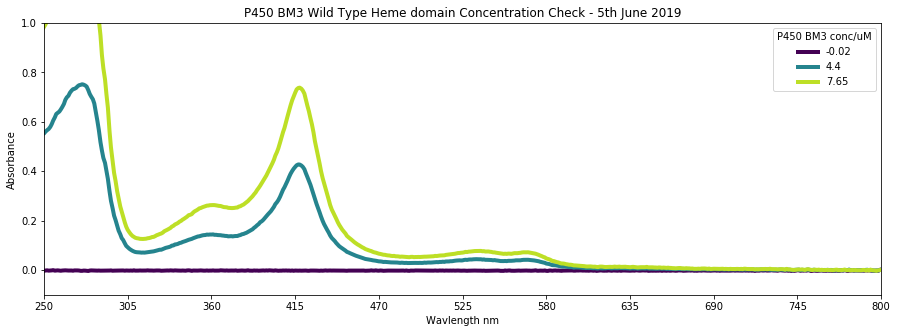

kpi              -0.021860
bm3_target5uM     4.400313
bm3_target10uM    7.652368
Name: Concs, dtype: float64

In [2]:
from ProteinConcCheck import dataset

WorkingConcs = dataset('20191219_bm3WT_workingConcs.csv')
WorkingConcs.plot_traces()
WorkingConcs.calc_conc()

In [4]:
import pandas as pd
import numpy as np
from PlateAnalysis import PlateDataset
import matplotlib.pyplot as plt
import re




VolMap = dict(zip(range(1,25),[20]*8 + [30]*8 +\
                       [40]*8 ))

def PlotAndGetMerics(path,ProtConc, VolMap,triton):
    Plate = PlateDataset(path)

    metrics = pd.DataFrame([],columns = ['Percent Triton','Vol','[Protein]','Kd',\
                                         'Vmax','R_sq','Noise','Degree Shift'])

    for j in range(1,25):

        vol = VolMap[j]

        print('Triton: {}\t Working Volume: {}\t Protein Conc: {}'.format(triton,vol,ProtConc))

        NormalizedTraces, DifferenceSpec, DiffDiff, DegShift= Plate.AnalysisPipeline_1(j)
        print('Buffer Only')
        Plate.PlotBuffer(j)
        print('Prtein only')
        Plate.PlotProtein(j)
        print('Normalized Traces')
        Plate.PlotTrace(NormalizedTraces)
        print('Difference Traces')
        Plate.PlotTrace(DifferenceSpec)
        K,percentDMSO = 3, 5
        concs = Plate.CalculateCompoundConcs(K,vol,percentDMSO)
        km, vmax, loss = Plate.FitMichaelisMenten(concs, DiffDiff)
        Plate.PlotMichaelesMenten(DiffDiff,concs,\
                              km, vmax, loss,\
                              'Plate: {}'.format(Plate.plate_data))
        noise = Plate.Noise(NormalizedTraces)

        temp = pd.DataFrame([[triton,vol,ProtConc,km,vmax,1-loss, noise,DegShift]],\
                                      columns = ['Percent Triton','Vol','[Protein]',\
                                                 'Kd','Vmax','R_sq','Noise','Degree Shift'])
        metrics = metrics.append(temp,sort = True)

    metrics.reset_index(inplace = True,drop=True)
    return metrics

Plate_10uM = PlotAndGetMerics('20191219_clariostar_10uM.CSV', 7.652368, VolMap,triton=0)
Plate_5uM = PlotAndGetMerics('20191219_clariostar_5uM.CSV', 4.400313, VolMap,triton=0)

output = Plate_10uM.append(Plate_5uM)
output.reset_index(inplace = True,drop=True)
output.to_csv('20191219_PlateMetrics.csv')

KeyError: 'SampleID'

In [5]:
pd.read_csv('20191219_clariostar_10uM.CSV')

,User: USER,Path: C:\Program Files (x86)\BMG\CLARIOstar\User\Data,Test run no.: 25,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 493,Unnamed: 494,Unnamed: 495,Unnamed: 496,Unnamed: 497,Unnamed: 498,Unnamed: 499,Unnamed: 500,Unnamed: 501,Unnamed: 502
0,Test name: Spec,Date: 19/12/2019,Time: 16:57:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Used wavelength range(s): Range 1;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID1: 20191219_clariostar_10uM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Absorbance spectrum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Well,Content,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),...,Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum),Raw Data (Abs Spectrum)
6,NaN,Wavelength [nm],300,301,302,303,304,305,306,307,...,791,792,793,794,795,796,797,798,799,800
7,A01,Sample X1,0.348,0.325,0.306,0.291,0.277,0.264,0.259,0.25,...,0.045,0.045,0.044,0.045,0.044,0.043,0.045,0.046,0.045,0.044
8,A02,Sample X2,0.288,0.27,0.256,0.243,0.232,0.223,0.219,0.212,...,0.032,0.032,0.03,0.031,0.032,0.03,0.03,0.031,0.03,0.03
9,A03,Sample X3,0.348,0.324,0.306,0.29,0.276,0.263,0.257,0.247,...,0.044,0.043,0.043,0.042,0.042,0.042,0.044,0.044,0.043,0.042


In [9]:
pd.read_csv('20191217_KpiTriton.CSV',skiprows = 6)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,220,221,222,223,224,225,226,...,792,793,794,795,796,797,798,799,800,Unnamed: 584
0,A,1,Sample X1,1.732,1.884,1.922,1.952,2.059,2.061,2.353,...,0.034,0.034,0.029,0.032,0.033,0.031,0.033,0.033,0.029,NaN
1,B,1,Sample X25,2.306,2.269,1.996,1.775,1.834,2.284,2.405,...,0.028,0.028,0.024,0.025,0.027,0.026,0.028,0.027,0.023,NaN
2,C,1,Sample X49,1.987,2.012,2.005,2.131,2.295,2.258,2.364,...,0.047,0.047,0.045,0.047,0.047,0.048,0.047,0.047,0.044,NaN
3,D,1,Sample X73,3.500,3.500,1.843,2.157,2.224,2.341,2.365,...,0.027,0.027,0.024,0.026,0.028,0.026,0.029,0.027,0.024,NaN
4,E,1,Sample X97,2.749,2.291,2.007,1.876,2.409,2.634,2.461,...,0.043,0.043,0.040,0.041,0.042,0.042,0.043,0.043,0.039,NaN
5,F,1,Sample X121,2.252,2.563,2.375,1.979,2.221,2.334,2.874,...,0.070,0.071,0.070,0.072,0.074,0.073,0.072,0.072,0.068,NaN
6,G,1,Sample X145,3.500,3.500,2.021,2.211,2.408,2.306,2.711,...,0.081,0.081,0.080,0.081,0.083,0.083,0.082,0.081,0.078,NaN
7,H,1,Sample X169,1.943,2.343,2.674,1.952,2.063,3.500,2.533,...,0.086,0.086,0.086,0.087,0.089,0.089,0.088,0.087,0.085,NaN
8,I,1,Sample X193,1.896,1.997,1.953,2.015,2.496,2.295,2.524,...,0.075,0.075,0.075,0.076,0.078,0.077,0.078,0.076,0.073,NaN
9,J,1,Sample X217,1.691,1.735,1.993,1.823,2.061,2.399,2.268,...,0.063,0.063,0.062,0.063,0.065,0.064,0.065,0.063,0.061,NaN


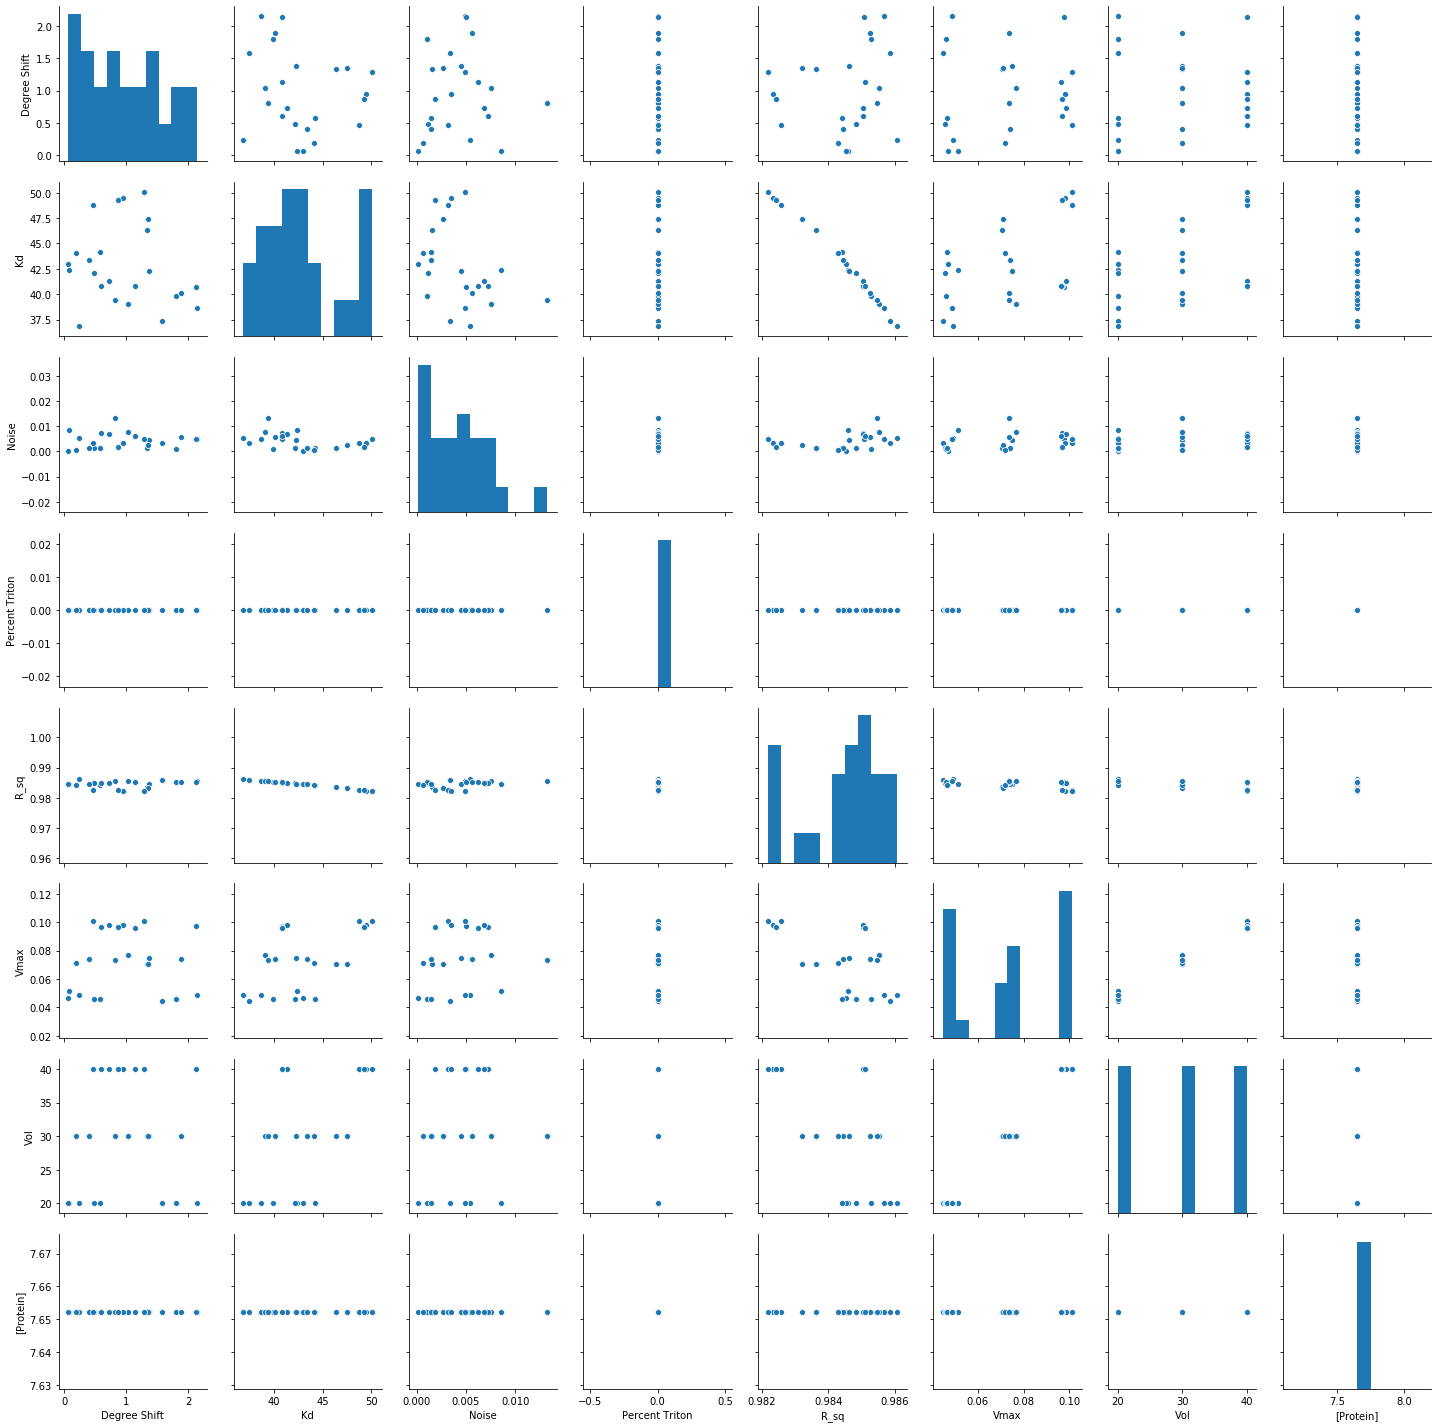

In [8]:
import seaborn as sns

sns.pairplot(Plate_10uM.dropna())
plt.show()

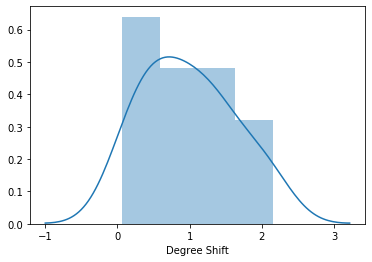

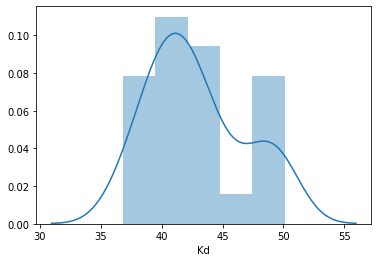

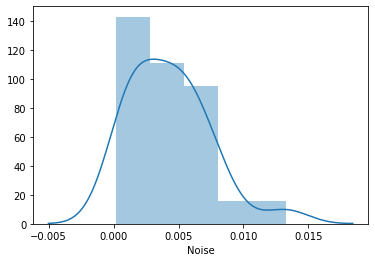

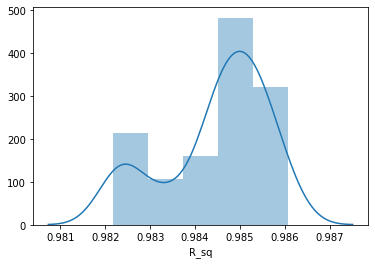

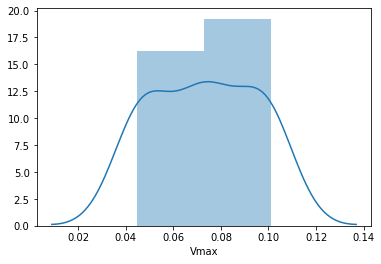

In [10]:
for i in ['Degree Shift', 'Kd', 'Noise', 'R_sq', 'Vmax']:
    sns.distplot(Plate_10uM[i])
    plt.show()